In [104]:
# ###################################
# Group ID : 741
# Members : Simon Loi Baks, Vasiliki Ismiroglou
# Date : 04/10/2023
# Lecture: Lecture 6 Linear discrimination
# Dependencies: numpy, scipy.io.loadmat, scipy.stats.multivariate_normal, matplotlib.pyplot, sklearn.decomposition.PCA, sklearn.discriminant_analysis.LinearDiscriminantAnalysis, sklearn.metrics.confusion_matrix, sklearn.metrics.ConfusionMatrixDisplay,
# sklearn.linear_model.LOgisticRegression, sklearn.preprocessing.StandardScaler, sklearn.neural_network.MLPClassifier
# Python version:3.11.5
# Functionality: Reducing dimensionality of data and performing multi-class classification using logistic regression, multilayer perceptron and LDA
# ###################################

In [105]:
import numpy as np
from scipy.io import loadmat
from scipy.stats import multivariate_normal as norm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [106]:
def create_complete_datasets(data_dict):
    '''
    Function for creating complete training and test sets containing
    all classes.
    '''
    #Empty list
    trainset = []
    traintargets =[]
    testset = []
    testtargets =[]
    
    #For each class
    for i in range(10):
        trainset.append(data_dict["train%d"%i])
        traintargets.append(np.full(len(data_dict["train%d"%i]),i))
        testset.append(data_dict["test%d"%i])
        testtargets.append(np.full(len(data_dict["test%d"%i]),i))
    
    #Concatenate into to complete datasets
    trainset = np.concatenate(trainset)
    traintargets = np.concatenate(traintargets)
    testset = np.concatenate(testset)
    testtargets = np.concatenate(testtargets)
    return trainset, traintargets, testset, testtargets

file = "data/mnist_all.mat"
data = loadmat(file)

#Complete training and test sets
train_set, train_targets, test_set, test_targets = create_complete_datasets(data)

Performing dimensionality reduction

In [107]:
n_components = 9

#PCA
pca = PCA(n_components = n_components)
pca.fit(train_set)
train_pca = pca.transform(train_set)
test_pca = pca.transform(test_set)
#LDA
lda = LDA(n_components = n_components)
lda.fit(train_set, train_targets)
train_lda = lda.transform(train_set)
test_lda = lda.transform(test_set)


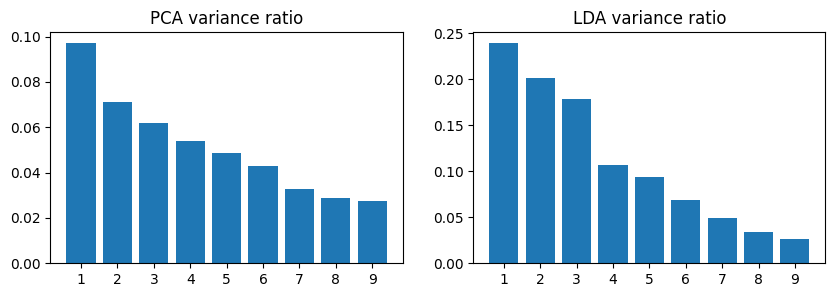

In [108]:
# Analyze proportion of Variance. If num_components=2 try to visualize dim. reduced data.
plt.figure(figsize=(10, 3))
plt.subplot(1,2,1)
plt.title('PCA variance ratio')
plt.bar([*range(1, n_components + 1)], pca.explained_variance_ratio_)
plt.xticks([*range(1, n_components + 1)])

plt.subplot(1,2,2)
plt.title('LDA variance ratio')
plt.bar([*range(1, n_components + 1)], lda.explained_variance_ratio_)
plt.xticks([*range(1, n_components + 1)])
plt.show()

Logistic Regression on both datasets

In [109]:
# Logistic regression 
clf_lr = LogisticRegression(max_iter=300, random_state=42)

clf_lr_pca = clf_lr.fit(train_pca, train_targets)
cm_pca = confusion_matrix(test_targets, clf_lr_pca.predict(test_pca))

clf_lr_lda = clf_lr.fit(train_lda, train_targets)
cm_lda = confusion_matrix(test_targets, clf_lr_lda.predict(test_lda))

c:\Users\vismi\Documents\University\ce7_ml_2023\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


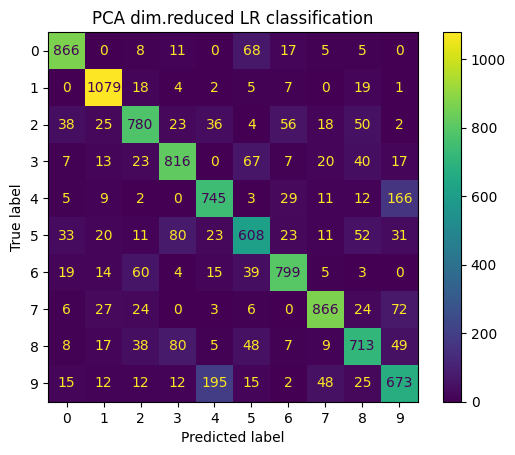

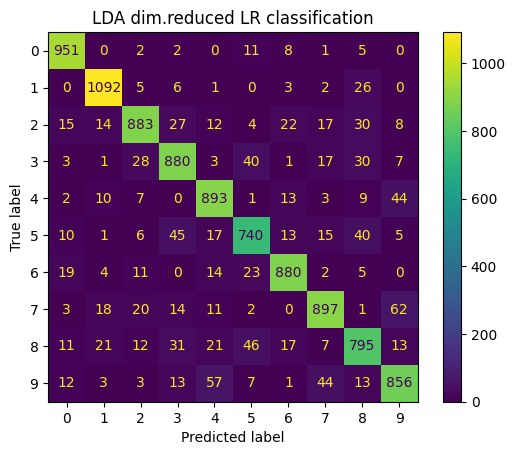

In [110]:
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_pca, display_labels=clf_lr_pca.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_lda, display_labels=clf_lr_lda.classes_)

disp1.plot()
plt.title('PCA dim.reduced LR classification')
disp2.plot()
plt.title('LDA dim.reduced LR classification')
plt.show()


Multilayer perceptron classification on both datasets

In [111]:
#MLP for pca data
clf_mlp = MLPClassifier([32], random_state=42)

clf_mlp.fit(train_pca, train_targets)
cm_pca = confusion_matrix(test_targets, clf_mlp.predict(test_pca))

clf_mlp.fit(train_lda, train_targets)
cm_lda = confusion_matrix(test_targets, clf_mlp.predict(test_lda))

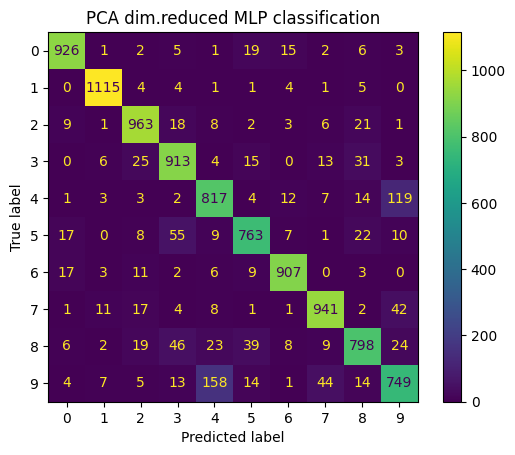

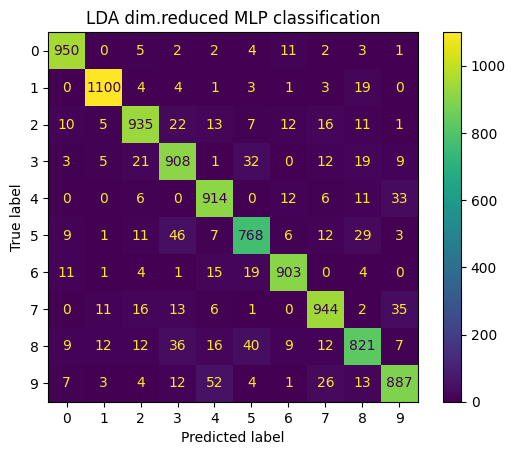

In [ ]:
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_pca, display_labels=clf_mlp.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_lda, display_labels=clf_mlp.classes_)

disp1.plot()
plt.title('PCA dim.reduced MLP classification')
disp2.plot()
plt.title('LDA dim.reduced MLP classification')
plt.show()

LDA classification

In [ ]:
#LDA classification
clf_lda = LDA()

clf_lda.fit(train_pca, train_targets)
cm_pca = confusion_matrix(test_targets, clf_lda.predict(test_pca))

clf_lda.fit(train_lda, train_targets)
cm_lda = confusion_matrix(test_targets, clf_lda.predict(test_lda))

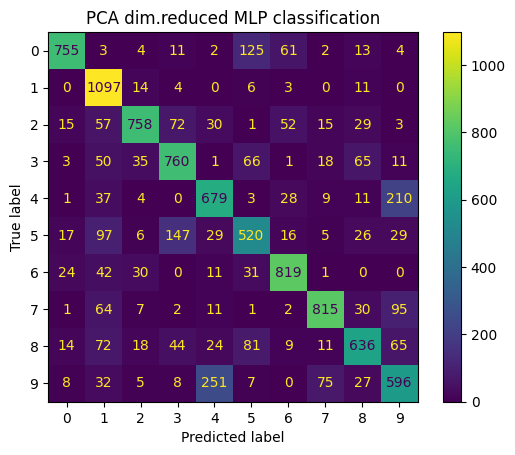

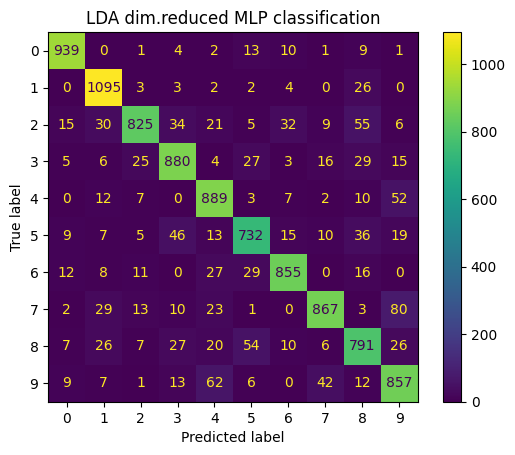

In [ ]:
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_pca, display_labels=clf_mlp.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_lda, display_labels=clf_mlp.classes_)

disp1.plot()
plt.title('PCA dim.reduced MLP classification')
disp2.plot()
plt.title('LDA dim.reduced MLP classification')
plt.show()